<a href="https://colab.research.google.com/github/SHUBHAM-55555/Bike-Sharing-Demand-Prediction---Supervised-machine-Learning-Regression/blob/main/Seoul_Bike_Sharing_Demand_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Seoul Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Shubham Suresh Mandhare


# **Project Summary -**

I have chosen the Project named as Seoul Bike Sharing Demand Prediction. In the starting when i started the project it was very tough for me to execute the whole project from scrach, so i decided to search it on various platforms, i searched the same project on multiple plateforms like on github, kaggle, youtube, google then i finally got an idea about the project what are the insights of the project in actual.

when i started this project first i studied about all the features in the dataset to get the more clear idea about the information so i got to know its about the rented bikes data when the bike was rented, for how long, what was the frequent time for most of the bikes rented for, what are the weather conditions taking effect on like during summer, winter, autumn and rainy and at the time of foggy atmosphere, so i learned all the parameters from the data to make it more understandable for myself.

afte i did some kind of data visualization using different kind of graphs like scatterplot, bar plot , histogram heatmap to know about the correlation between the features present inside the data.

at last i did some feature engineering on the data set like to apply mse,rmse,R square and adjusted R square to get the best fit model parameters.  
this all the things i have included in my project which is of regression analysis.


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/SHUBHAM-55555/Bike-Sharing-Demand-Prediction---Supervised-machine-Learning-Regression/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import datetime as dt
import datetime as datetime

### Dataset Loading

In [6]:
# Load Dataset
bike_data = pd.read_csv('/content/SeoulBikeData.csv',encoding = 'unicode_escape')

### Dataset First View

In [7]:
# Dataset First Look

In [8]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
# data sets last 5 rows by default using tail method
bike_data.tail()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count rows = 8760, and no. of columns = 14
bike_data.shape

(8760, 14)

### Dataset Information

In [11]:
# Dataset Info about the null values and type of dataset
bike_data.info()
# got to know that there are not null values in the data set which is very good dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
# describe method gives the mean, median , mode and the numeric information about the data set, here i havent included the rest of the columns other than numeric values
# but its possible by using the method .describe(include = 'all')
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
# finding the columns in the data set to visualize more better
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
bike_data.duplicated().sum()

0

**found 0 duplicate values in the data set**

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
# finding the no. of null value count from each columns which is found to be zero
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
# Visualizing the missing values
# after finding the null values which is 0, so no missing values are present in the data

### What did you know about your dataset?

**After doing a bit research about the data so i found out its a bike sharing data with the dependent variable "Rented Bike Count" and rest of the columns are indipendent variables, and the good thing about the data is not containing any missing or duplicate values in it.**

**The data is showing weather conditions like visibility, Rainfall, Snowfall which directly affect on the the bike business to get on rent, its very obvious that in rainy season to get the bike on rent its very less or when the vision is not clear due to the weather condition again the same scenario will happen, apart from this i got the information about the time period for which the bike is get rented and on which date it gets rented**

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
# Dataset Describe
# describe method gives the information about the numeric values within the data
bike_data.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

Answer Here

**Attribute Information:**

**Date : year-month-day**

**Rented Bike count - Count of bikes rented at each hour**

**Hour - Hour of the day**

**Temperature-Temperature in Celsius**

**Humidity - %**

**Windspeed - m/s**

**Visibility - 10m**

**Dew point temperature - Celsius**

**Solar radiation - MJ/m2**

**Rainfall -  Rainfall in mm**

**Snowfall - cm**

**Seasons - Winter, Spring, Summer, Autumn**

**Holiday - Holiday/No holiday**

**Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)**

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
bike_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
#Converting the datatype of Date column from object  to datatime
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')

In [21]:
#Extracting Month,Weekday and Year from the date column
bike_data['Month']=bike_data['Date'].dt.month
bike_data['Days_of_week']=bike_data['Date'].dt.day_name()
bike_data['Year']=bike_data['Date'].dt.year
bike_data['Day']=bike_data['Date'].dt.day

In [22]:
bike_data.shape

(8760, 18)

**New columns creating as per the requirments**

In [23]:
#The number of unique values in Date column
bike_data['Date'].nunique()

365

In [24]:
#The number of unique values in Year column
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

Most of the data belongs to year 2018 as above

In [25]:
#Finding the date of first and last entry in the dataset
print(f'The dataset contains observations from ',min(bike_data['Date']).date(),'to',max(bike_data['Date']).date())

The dataset contains observations from  2017-12-01 to 2018-11-30


In [26]:
#Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bike_data['Weekend']=bike_data['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [27]:
#Displaying the unique values in the categorical columns
categorical_columns=['Seasons','Holiday', 'Functioning Day','Days_of_week','Weekend']

for col in categorical_columns:
  print(f'The unique values in the column {col} are {bike_data[col].unique()}')

The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


### What all manipulations have you done and insights you found?

**The very first thing which i did, i changed the datatype of "Date" columns to its original belonging data type which is Date type columns**

**After that i created saperate columns for each information like for days, year and month to extract the exact information from it.**

**Then i applied the lambda an anonymous function to find out whether the is weekday or weekend.**

**Finally i took the unique values from the above mentioned columns to get the insights from the data that the unique values are present in the data**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

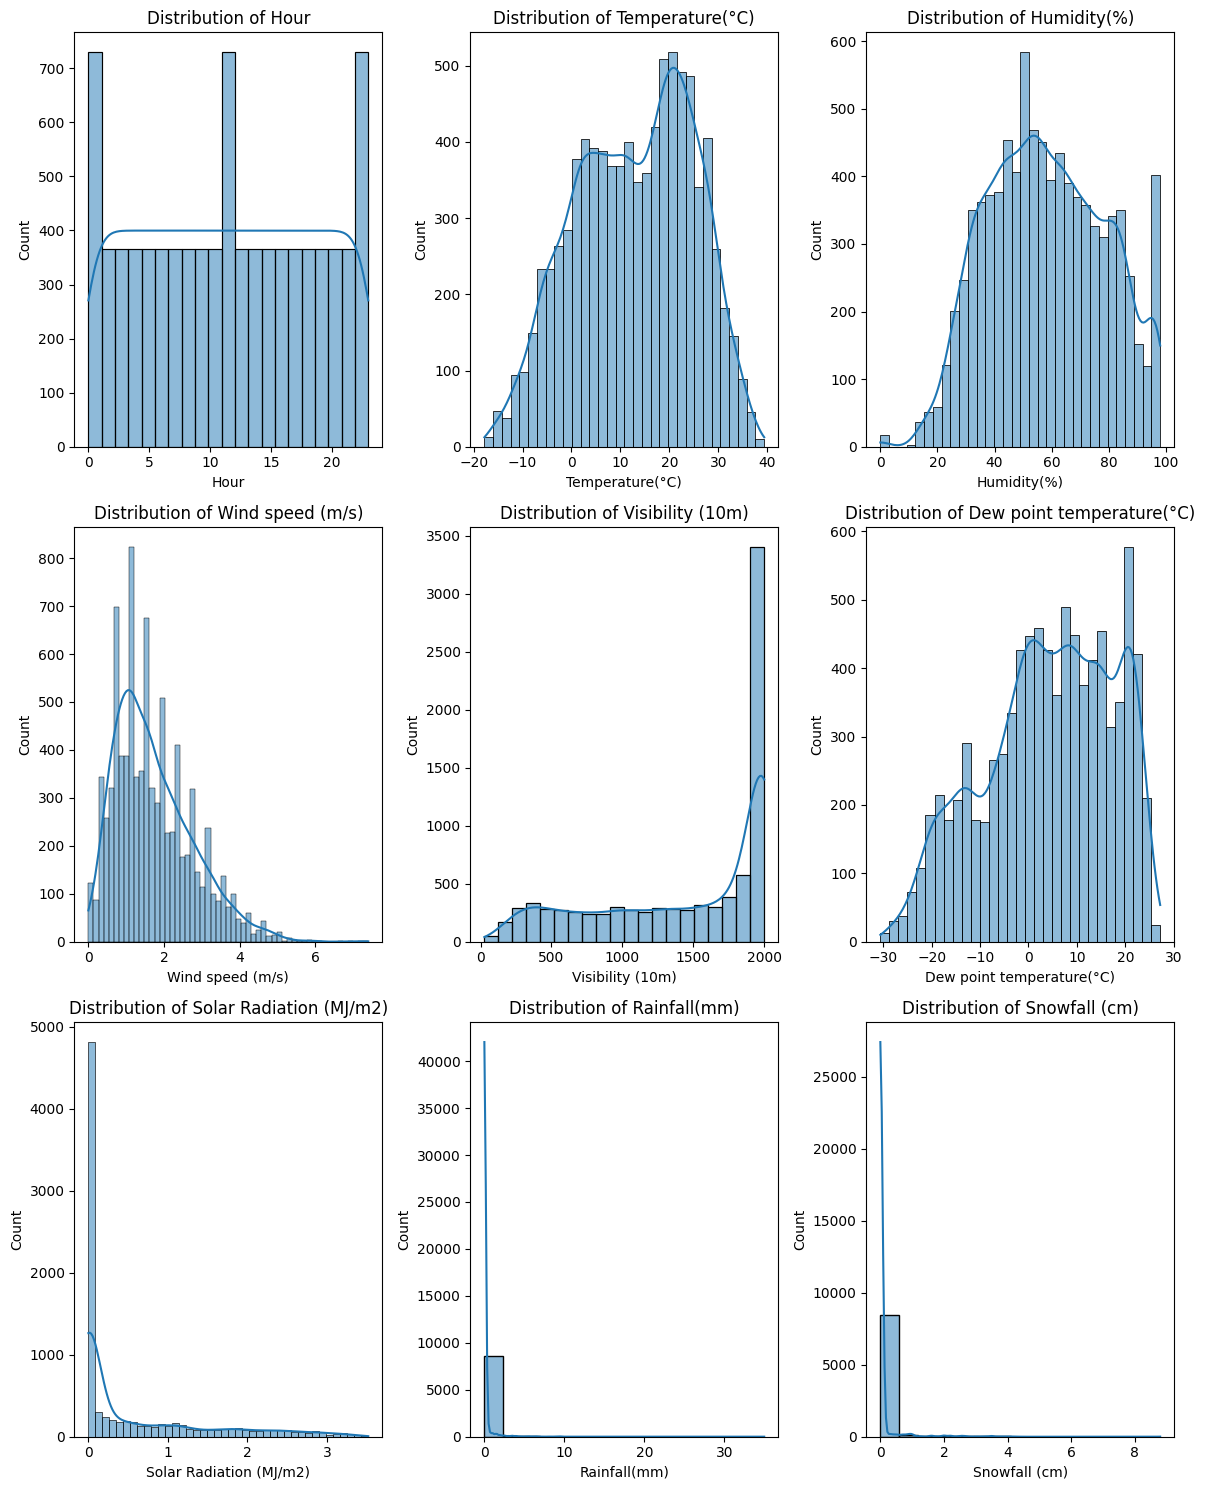

In [28]:
# Chart - 1 visualization code
fig = plt.figure(figsize=(12,15))
c = 1
list1 = ['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for i in list1:
  plt.subplot(3,3,c)
  sns.histplot(bike_data[i],kde = True)
  plt.title('Distribution of {}'.format(i))
  c+=1
plt.tight_layout()


##### 1. Why did you pick the specific chart?

**To show the Distribution of data whether its positively skewed or negatively or normally distributed**

##### 2. What is/are the insight(s) found from the chart?

Distribution of Temperature,Humidity,Dew point temperature are almost normal.

Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed

Visibility is negatively skewed

#### Chart - 2

Text(0.5, 1.0, 'Distibution of Rented Bike Count')

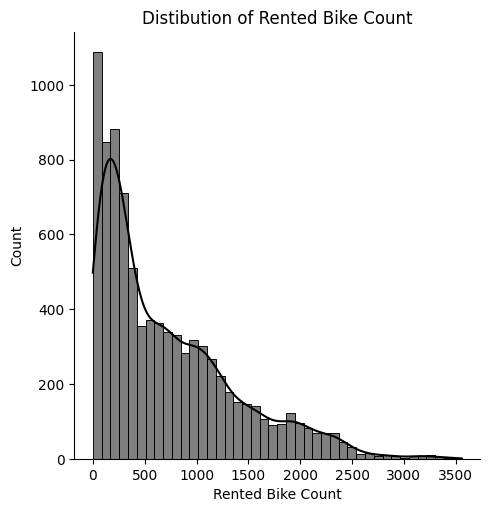

In [29]:
# Chart - 2 visualization code
sns.displot(bike_data['Rented Bike Count'],kde=True,color='black')
plt.title('Distibution of Rented Bike Count')

##### 1. Why did you pick the specific chart?

**How is the dependent variable Rented Bike Count distributed**

##### 2. What is/are the insight(s) found from the chart?

**The dependent variable which is dependent on indipendent variable whose disrtibution is as above visualized**

#### Chart - 3

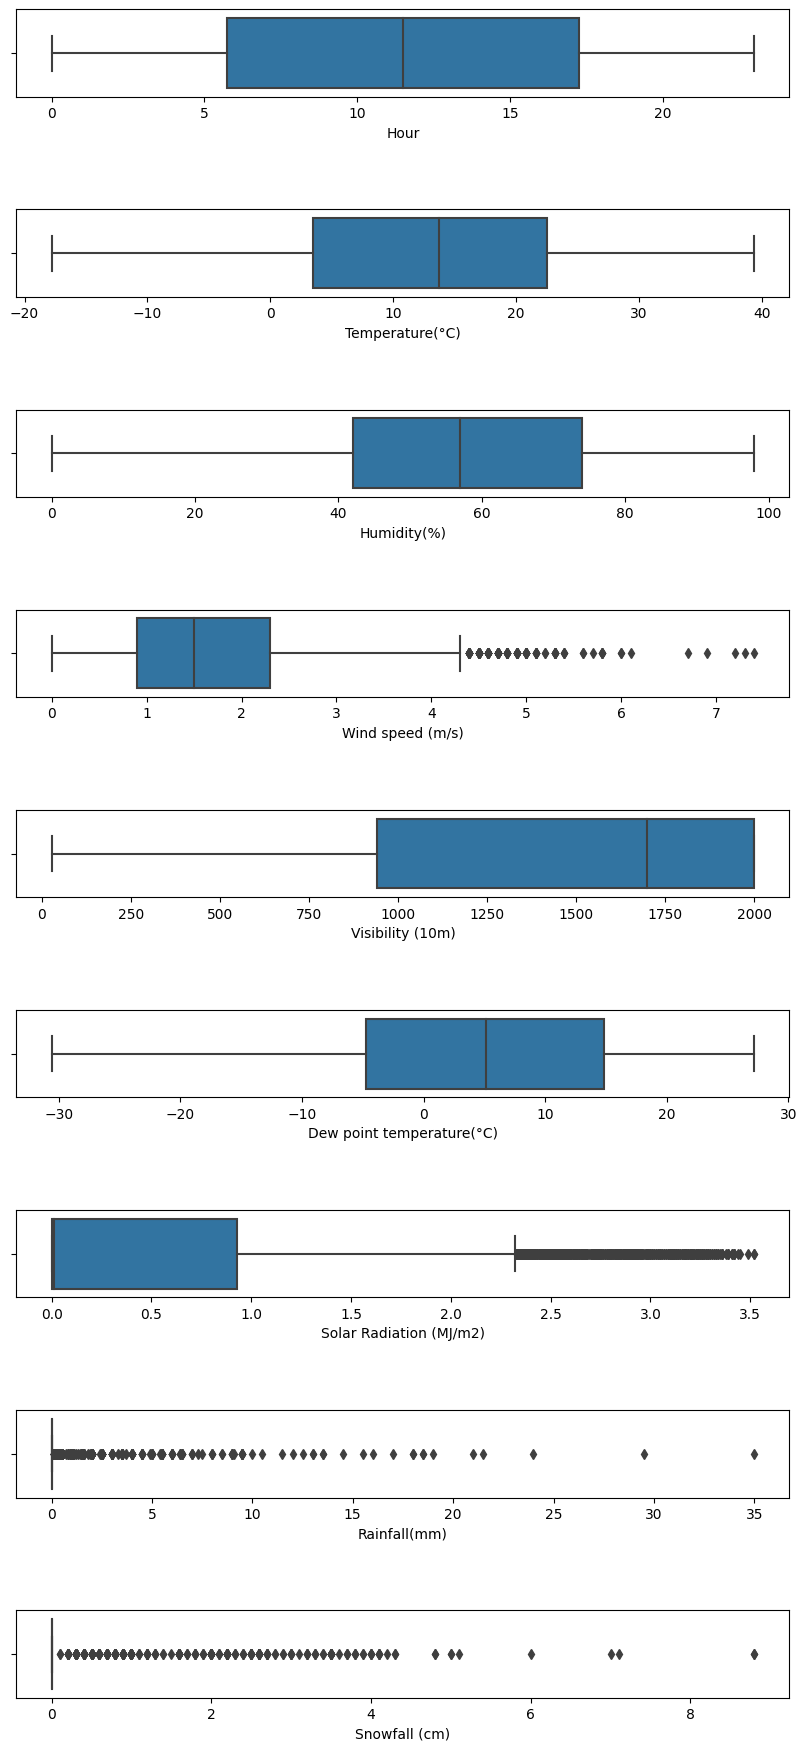

In [30]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(8,25))
c=1
for i in list1 :
    plt.subplot(13,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=bike_data)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### 1. Why did you pick the specific chart?

**To find any outliers in the data present or not???**

##### 2. What is/are the insight(s) found from the chart?

**The outlier values are not extreme,nor unusual.So,we retain these values in our dataset.**

#### Chart - 4

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

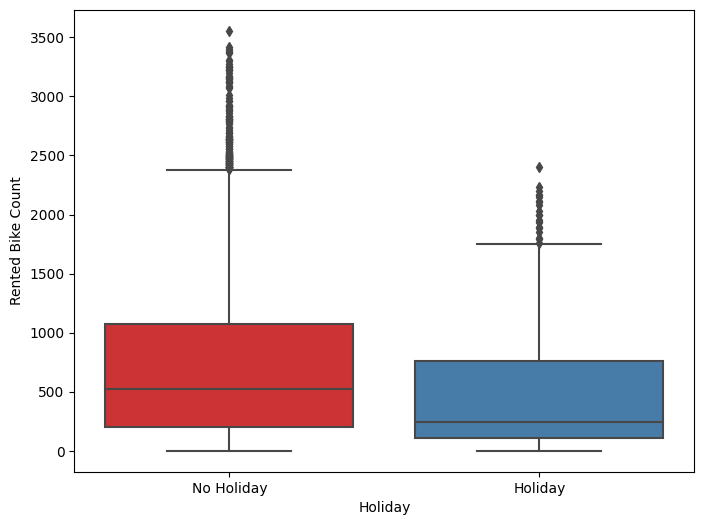

In [31]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bike_data,palette='Set1')

##### 1. Why did you pick the specific chart?

**What is the likelihood of people renting bikes on holidays and non-holidays**

##### 2. What is/are the insight(s) found from the chart?

**The demand for rented bikes is higher on non-Holidays. which means people generally prefering the bike to get rent on non-holidays**

#### Chart - 5

<Axes: xlabel='Days_of_week', ylabel='Rented Bike Count'>

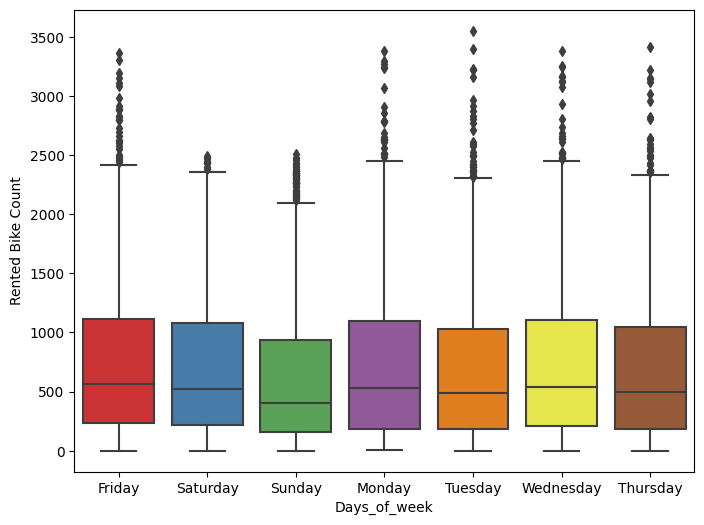

In [32]:
# Chart - 5 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x='Days_of_week',y='Rented Bike Count',data=bike_data,palette='Set1')

##### 1. Why did you pick the specific chart?

**To find the demand of rented bikes as per the days of week**

##### 2. What is/are the insight(s) found from the chart?

**Least demand on Sunday,Slightly higher demand on Friday More demand on weekdays than weekends.**

#### Chart - 6

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

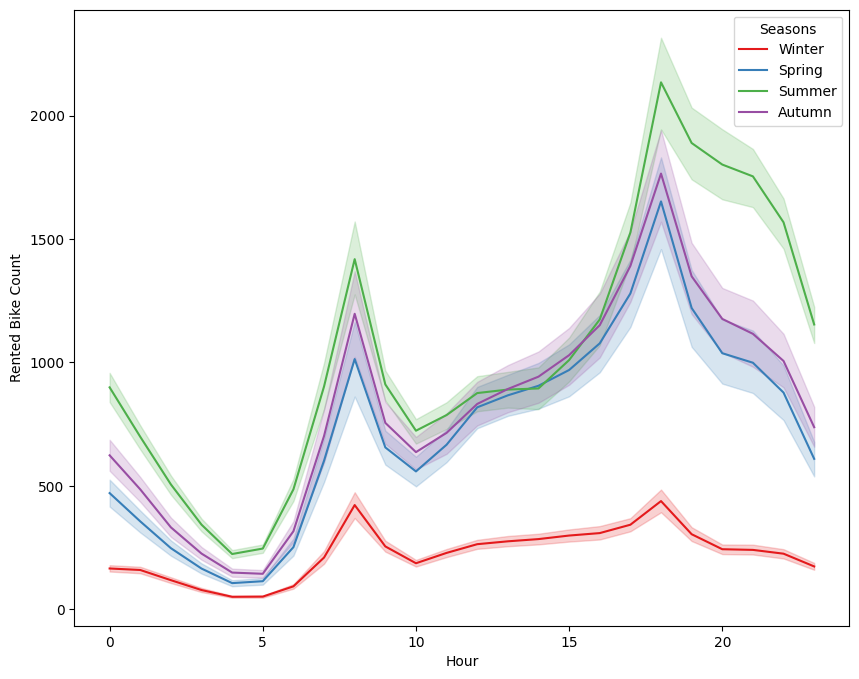

In [33]:
# Chart - 6 visualization code
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=bike_data,palette='Set1',hue='Seasons',lw=1.5)

##### 1. Why did you pick the specific chart?

**What is the demand for rental bikes during different hours of the day**

##### 2. What is/are the insight(s) found from the chart?

**The demand for rental bikes peaks at 8 (8:00 am) and 18 (6:00 PM ).
which clearly indicates that during the office hours people generally prefer to get the bike on rent**

**This peak in demand coincides with opening and closing hours of various institutions and offices.**

**The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM**

#### Chart - 7

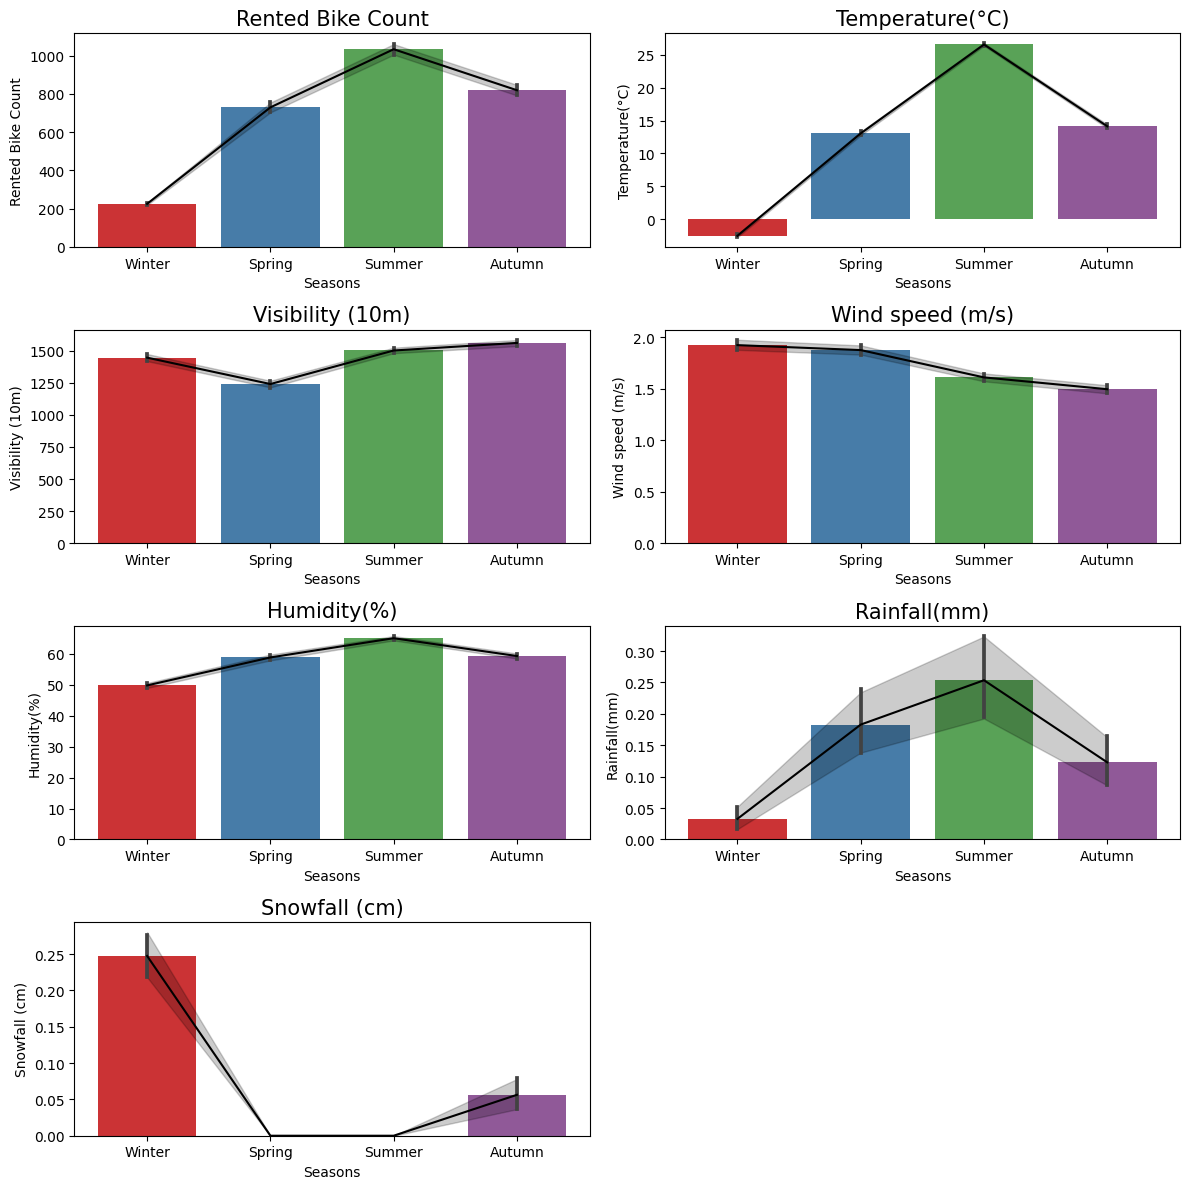

In [34]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bike_data, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bike_data, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**The seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received.**

##### 2. What is/are the insight(s) found from the chart?

**Temperature and Hour have a strong correlation with the count of rented bikes.

Dew point temperature is highly positively correlated to the Temperature.

During the period from Dec 2017 to Nov 2018,bike rental facilities were available on most days.The service was unavailable only for 13 days.

The demand for rental bikes is higher on Regular days(Non-Holidays) .

There is more demand for rental bikes on Weekdays than on Weekends.

The peak demands for rental bikes occur on the opening (8-9 AM) and closing times (6-7pm) of offices and institutions.**

#### Chart - 8

<Axes: xlabel='Weekend', ylabel='Rented Bike Count'>

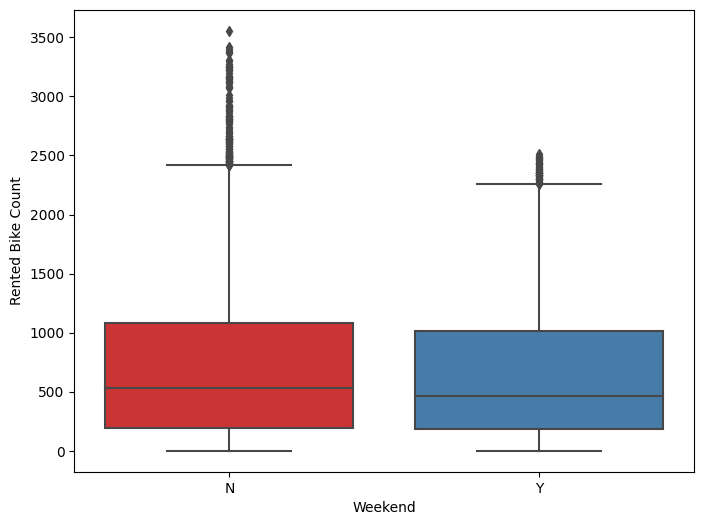

In [35]:
# Chart - 8 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x='Weekend',y='Rented Bike Count',data=bike_data,palette='Set1')

##### 1. Why did you pick the specific chart?

**To find the demand of rented bike on weekdays and on weekends**

##### 2. What is/are the insight(s) found from the chart?

**The average demand for rental bikes is lower on Weekends(Sat-Sun) as compared to Weekdays(Mon-Fri).**

#### Chart - 9

<Axes: xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

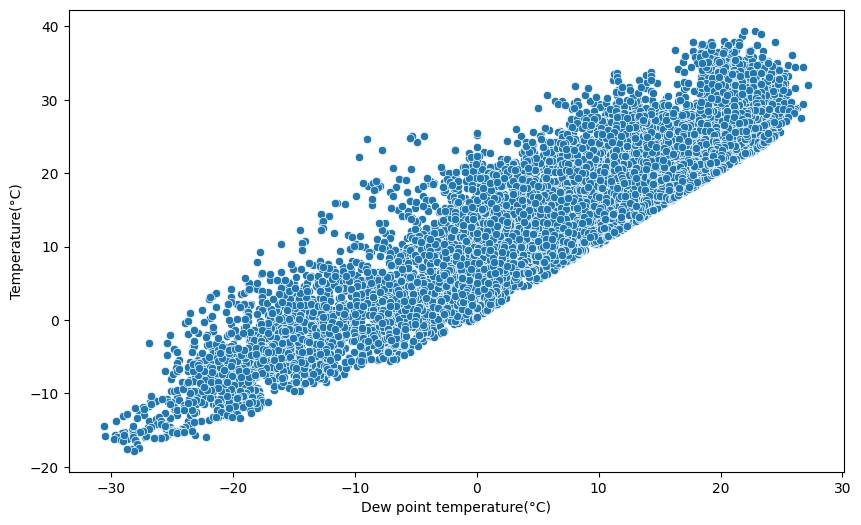

In [36]:
# Chart - 9 visualization code
plt.figure(figsize=[10,6])
sns.scatterplot(data=bike_data, y='Temperature(°C)', x='Dew point temperature(°C)')

##### 1. Why did you pick the specific chart?

**To show how much Dew point temperature is affected by the other variable Temperature**

##### 2. What is/are the insight(s) found from the chart?

**Both the variables affected by each other as the temperature goes on increasing the dew point temperature is also increasing which indicates the clear weather condition with less dew**

#### Chart - 10

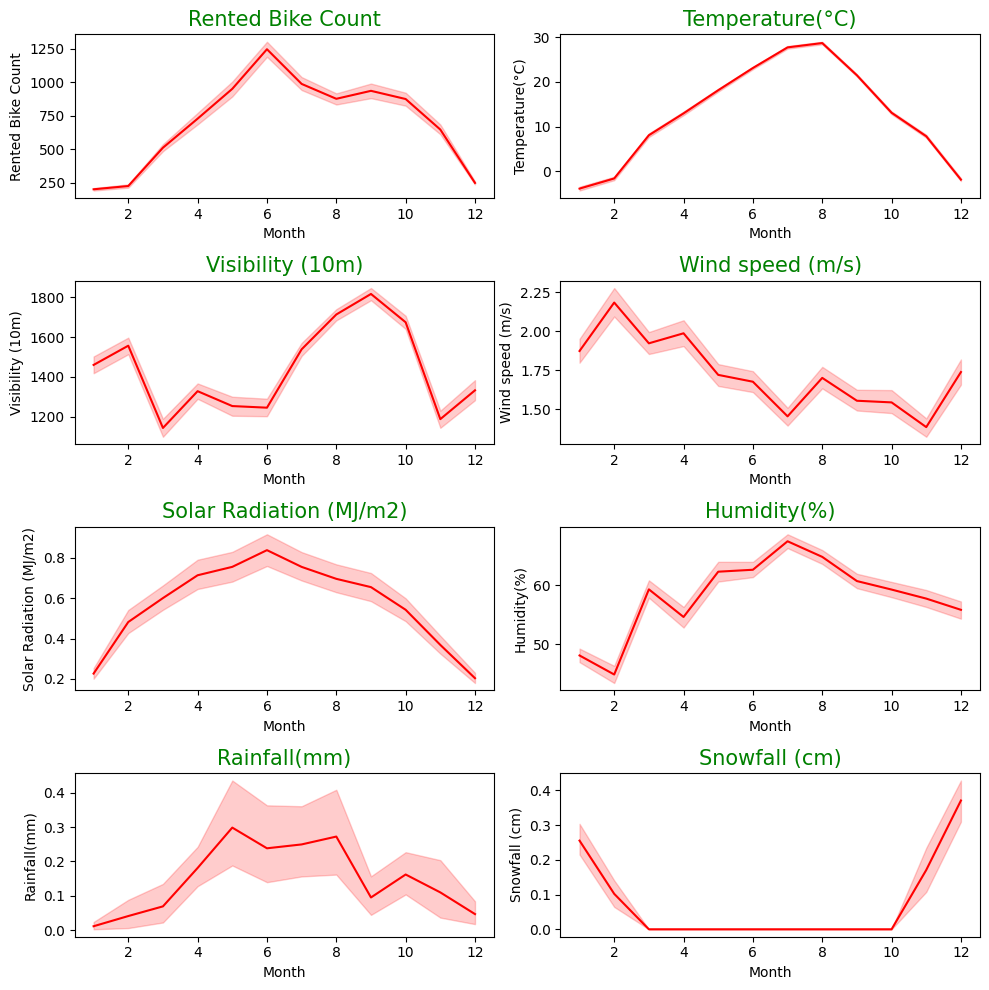

In [37]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(10,10))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_data, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**What are the factors which influence the demand for rental bikes during different months?**

##### 2. What is/are the insight(s) found from the chart?

The monthly count of rented bikes is positively associated with Temperature.

Snowfall movement coincides with season, with heavy snowfall from December to February throughout the winter season. There's a decline in count of rented bikes during these months.

Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.

#### Chart - 11

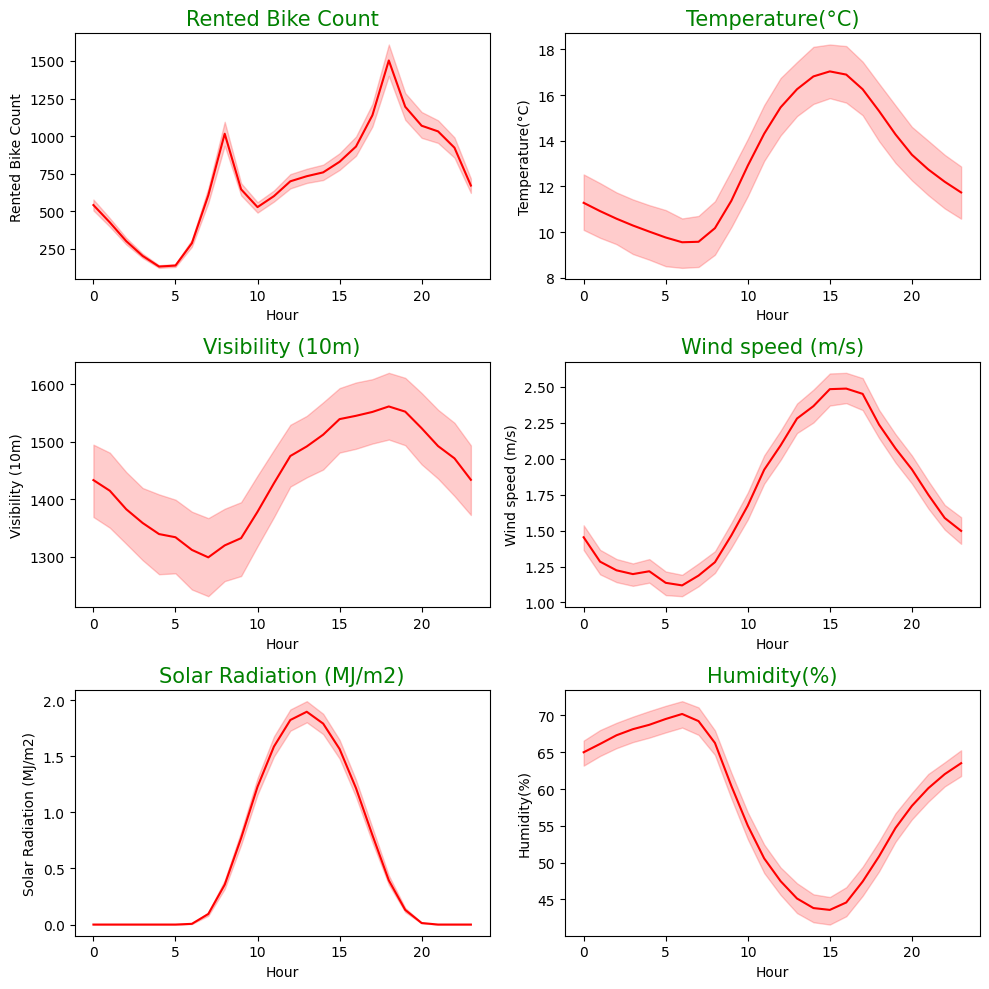

In [38]:
# Chart - 11 visualization code
fig = plt.figure(figsize=(10,10))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_data, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**What are the factors which influence the demand for rental bikes during a day?**

##### 2. What is/are the insight(s) found from the chart?

**Temperature, visibility, windspeed, and humidity appear to be positively associated to the hourly demand for rental bikes.**

**The rented bike counts are highest during the hours from 7:00 AM to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.**

#### Chart - 12

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

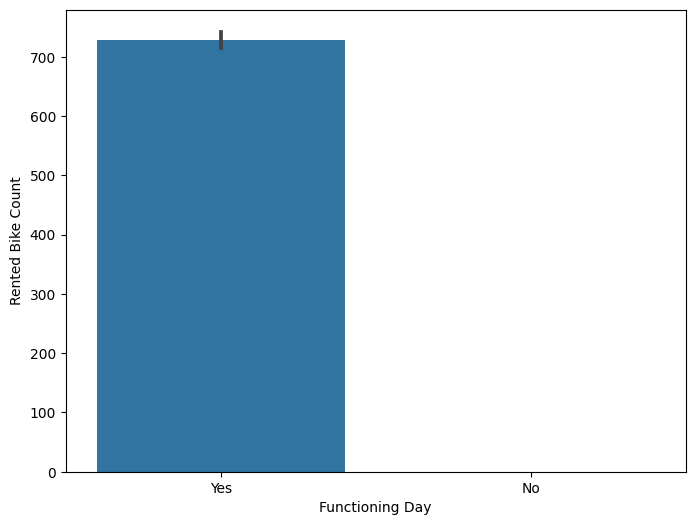

In [39]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bike_data)


##### 1. Why did you pick the specific chart?

**Were rental services offered on non-functional days**

##### 2. What is/are the insight(s) found from the chart?

The rental service were functional on most days during the period from Dec 2017 to Nov 2018(only 13 non-functional days)

Although,we've observed few records on Non-Functioning Day,rental services were not offered on those days(no exceptions)

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-41-dff91fe74ea0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_data.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Blues')


<Axes: >

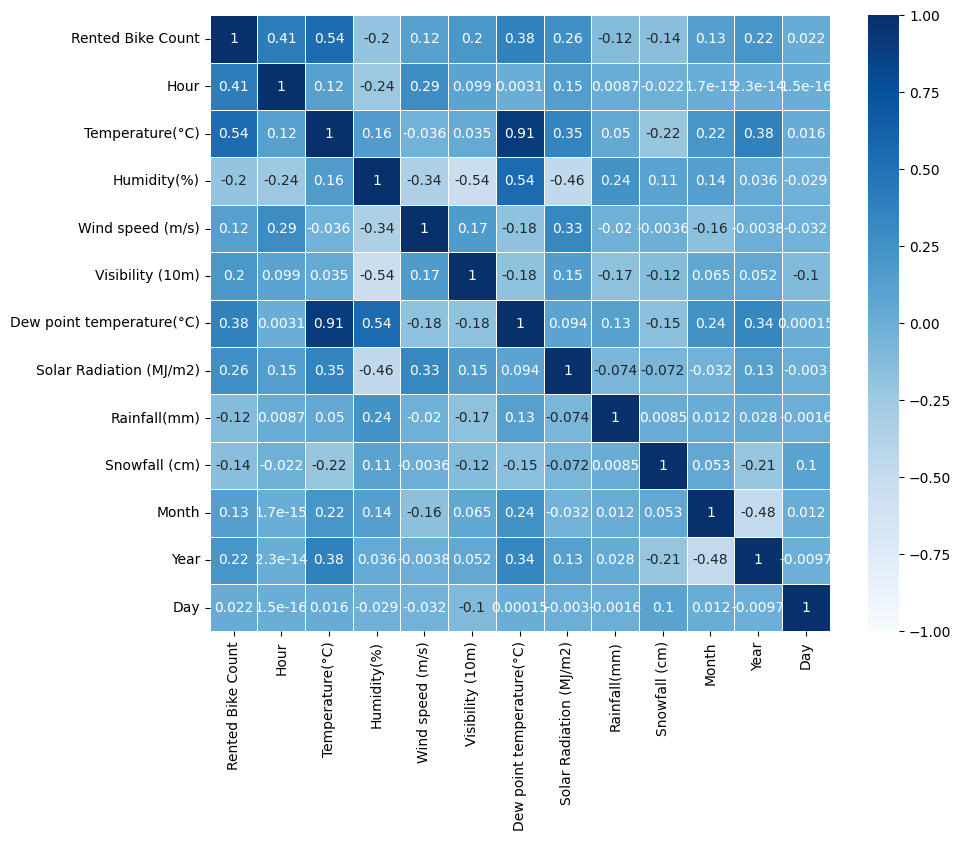

In [41]:
# Correlation Heatmap visualization code
plt.figure(figsize = (10,8))
sns.heatmap(bike_data.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Blues')

##### 1. Why did you pick the specific chart?

**To find the correlation between the features with other features**

##### 2. What is/are the insight(s) found from the chart?

**Dew point temperature is strongly correlated with temperature.**

**Temperature,Hour shares a stronger correlation with Rented Bike count**

## ***6. Feature Engineering & Data Pre-processing***

1: **VARIANCE INFLATION FACTOR**

In [42]:
# CHECKING THE MULTICOLLINEARITY BETWEEN THE VARIABLES
#Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''

  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [43]:
#Displaying the columns in the dataframe
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Year', 'Day',
       'Weekend'],
      dtype='object')

In [44]:
#Checking the VIF value of certain columns in bike_data.
check_vif(bike_data[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


In [45]:
# checking the VIF score again for better results.
check_vif(bike_data[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


In [46]:
#Dropping 'Dew point temperature(°C)','Year' to reduce the VIF
bike_data.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)


**Now we can clearly see after removing some of the highly correlated variables, rest of the features are with less correlation and now in the acceptable range**

In [47]:
#Creating a copy of the main dataframe 'bike_data'
df=bike_data.copy()

In [48]:
#Creating dummies for the Categorical columns
df = pd.get_dummies(bike_data, columns = ['Seasons','Holiday','Weekend','Functioning Day'],drop_first=True)
df.head(2)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Days_of_week,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1


In [49]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Days_of_week', 'Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Weekend_Y', 'Functioning Day_Yes'],
      dtype='object')

In [50]:
df.shape

(8760, 19)

In [51]:
#Dropping the columns Date and Days_of_week
df.drop(['Days_of_week','Date'],axis=1,inplace=True)


In [52]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Weekend_Y',
       'Functioning Day_Yes'],
      dtype='object')

In [53]:
df.shape

(8760, 17)

**IMPLEMANTATION OF REGRESSION MODELS TO CHECK THE BEST FIT FOR THE DATASET**

In [54]:
# IMPORTING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [55]:
#Defining independent and dependent variables

y = df['Rented Bike Count']
X = df.drop('Rented Bike Count',axis=1)

In [56]:
X_train, X_test,y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

In [57]:
print(f'The shape of X : {X.shape}\n The shape of X_train : {X_train.shape}\n The shape of X_test : {X_test.shape}')

The shape of X : (8760, 16)
 The shape of X_train : (6132, 16)
 The shape of X_test : (2628, 16)


In [58]:
#Creating functions to calculate the Evaluation metrics for the regression models

def evaluate_model(name,X_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating
  the perfomance of Regression models
  '''
  list_=[]
  #calculating mean absolute error
  MAE =  mean_absolute_error(y_true,y_pred)
  print(f'MAE : {MAE}')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_true,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_true,y_pred)
  print("R2 :" ,r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_true,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  list_.extend([name,MAE,MSE,RMSE,r2,adj_r2])
  return(list_)

In [59]:
#Creating a  list which would store lists of different models and their performance metrics
list_of_models=[]


## **LINEAR REGRESSION**

In [60]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [61]:
#Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

In [62]:
#Fitting the data to Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
#predicting the values of y from X_test
y_pred= regressor.predict(X_test)


In [64]:
#Evaluating the model
list_of_models.append(evaluate_model('Multiple Linear Regression',X_test,y_test,y_pred))

MAE : 327.6657898743315
MSE : 188770.6925362117
RMSE : 434.4774937050384
R2 : 0.5393478523845607
Adjusted R2 :  0.5365250127208889


## **LASSO REGRESSION**

In [65]:
#importing the classes required for Cross Validation
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gsv


In [66]:
#importing the linear_model class from sklearn library
from sklearn import linear_model

#Creating a Lasso Linear model object
ls_model = linear_model.Lasso()



In [67]:
#Creating the parameter grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005,)
grid['max_iter'] = [25,50,100,500,1000]

In [68]:
#performing GridSearch CV
ls_model=gsv(estimator=ls_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [69]:
#Training the model
ls_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.460e+08, tolerance: 2.059e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [70]:
#displaying the best estimators and score
print(ls_model.best_estimator_,'The best score is ',ls_model.best_score_)

Lasso(alpha=0.23500000000000001, max_iter=25) The best score is  0.5559063428609835


In [71]:
#Fitting the data to optimal Lasso model
best_lasso = ls_model.best_estimator_
best_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+07, tolerance: 2.567e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.23500000000000001, max_iter=25)

Lasso(alpha=0.23500000000000001, max_iter=25)

In [72]:
#Prediciting the values for y from X_test using the best parameters
y_pred=best_lasso.predict(X_test)

In [73]:
#Evaluating the model
list_of_models.append(evaluate_model('Lasso Regression(Tuned)',X_test,y_test,y_pred))


MAE : 327.5787900127513
MSE : 188737.802790525
RMSE : 434.4396422870788
R2 : 0.5394281123644419
Adjusted R2 :  0.5366057645275331


## **RIDGE REGRESSION**

In [74]:
#importing Ridge from linear_model class of sklearn library
from sklearn.linear_model import Ridge

In [75]:
#Creating an instance of Ridge regression
ridge=Ridge()

In [76]:
#Training the model
ridge.fit(X_train,y_train)

Ridge()

In [77]:
#predicting the values of y from the test data
y_pred=ridge.predict(X_test)

In [78]:
ridge.score(X_train,y_train)

0.558631773704932

In [79]:
#Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression (default)',X_test,y_test,y_pred))

MAE : 327.65717168634285
MSE : 188767.25013472006
RMSE : 434.473532145193
R2 : 0.5393562527862268
Adjusted R2 :  0.5365334645995472


In [80]:
#Creating an object of linear model with Ridge regularization
Ridge_model = linear_model.Ridge()


In [81]:
#Creating the parameter grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005)
grid['max_iter'] = [25,50,100,500,1000]

In [82]:
#Perfoming cross-validation to find the best model
Ridge_model=gsv(estimator=Ridge_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')
Ridge_model.fit(X_train,y_train)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [83]:
print(Ridge_model.best_estimator_,Ridge_model.best_score_)

Ridge(alpha=0.995, max_iter=25) 0.5558996785868935


In [84]:
#Fitting the train data to the Ridge model with best parameters
best_ridge = Ridge_model.best_estimator_
best_ridge.fit(X_train,y_train)


Ridge(alpha=0.995, max_iter=25)

In [85]:
Ridge(alpha=0.995, max_iter=25)

Ridge(alpha=0.995, max_iter=25)

In [86]:
y_pred = best_ridge.predict(X_test)

In [87]:
#Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression(Tuned)',X_test,y_test,y_pred))

MAE : 327.6572143132237
MSE : 188767.2672383388
RMSE : 434.4735518283464
R2 : 0.5393562110487166
Adjusted R2 :  0.5365334226062728


## **DECISION TREE REGRESSION**

In [88]:
#Splitting the data to train and test again(to obtain non-scaled test and train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
#Splitting the data to train and test again(to obtain non-scaled test and train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Creating a decision tree regressor object
dtr = DecisionTreeRegressor()

# hyper-parameter tuning using gridSearchCV
parameters = {'max_depth': [int(i) for i in np.linspace(start=3, stop=20, num=17)],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              }

gridsearch_dtr = GridSearchCV(dtr, parameters, scoring='r2', cv=5)
gridsearch_dtr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),

             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [91]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}'.format(gridsearch_dtr.best_params_['max_depth'],
                                    gridsearch_dtr.best_params_['min_samples_split'], gridsearch_dtr.best_params_['min_samples_leaf']))

Best parameters for our model are: max_depth=14, min_samples_split=2, min_samples_leaf=4


In [92]:
# train and test performance
train_score = gridsearch_dtr.best_score_
test_score = gridsearch_dtr.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.871958347768753
The best r2 score for test data is 0.8696045211860001


## **XG BOOST REGRESSION**

In [93]:
#importing the required packages and classes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [94]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [95]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

list_of_models.append(evaluate_model('XGBoost Regression(default)',X_test,y_test,predictions))

MAE: 102.09748389228294
MSE: 29845.123780706403
RMSE: 172.75741309913855
R2 Score: 0.9271697307420022
------------------------------
RMSE Cross-Validation: 314.24776035333974
MAE : 102.09748389228294
MSE : 29845.123780706403
RMSE : 172.75741309913855
R2 : 0.9271697307420022
Adjusted R2 :  0.9267234326538643


In [96]:
#Comparing models
Comparison_df=pd.DataFrame(list_of_models,columns=['Regression Model','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','r2 score','adjusted r2 score'])
Comparison_df


,Regression Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,r2 score,adjusted r2 score
0,Multiple Linear Regression,327.665790,188770.692536,434.477494,0.539348,0.536525
1,Lasso Regression(Tuned),327.578790,188737.802791,434.439642,0.539428,0.536606
2,Ridge Regression (default),327.657172,188767.250135,434.473532,0.539356,0.536533
3,Ridge Regression(Tuned),327.657214,188767.267238,434.473552,0.539356,0.536533
4,XGBoost Regression(default),102.097484,29845.123781,172.757413,0.927170,0.926723


# **Conclusion**

**Evaluating the performance metrics of the models has brought us to a conclusion that Decison tree based Ensemble models like XGBoost is the most suitable for Predicting the number of bikes required on an hourly basis.**

**We have seen their is also some effect of weather on renting bike numbers and most of the bikes rented on the official timinigs like 9-6 which is a standard time for officaills which can be determined from the data that on weekends renting bikes percentage goes on decreasing**



**The important features for prediction are : Hour &Temperature.**

**Due to the lack of significant linear correlation between the independent variables and the count of Rented bikes,Linear regression is not good fit in this scenario**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***